# คำถาม
1. วิเคราะห์และสำรวจข้อมูลเบื้องต้น 
1. ตั้งประเด็นคำถามที่น่าสนใจพร้อมสร้าง machine learning model เพื่อตอบคำถาม

In [1]:
import math
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pd.Timestamp.now()
# pd.Timestamp.now().strftime('%Y-%m-%d')

Python  version: 3.8.2 (default, Mar 26 2020, 10:43:30) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas  version: 1.2.5
numpy   version: 1.20.2
seaborn version: 0.11.1


Timestamp('2021-06-29 15:02:37.516528')

## 1. วิเคราะห์และสำรวจข้อมูลเบื้องต้น (10 คะแนน)

### WHO latest COVID data
data: https://covid19.who.int/table

In [4]:
from datetime import datetime
import socket # pip install socket

print(f'last run: {datetime.now()}')

try:
    print(f'host info: {socket.gethostbyname_ex(socket.gethostname())}')
except:
    pass

data_url='https://raw.githubusercontent.com/GuySuphakit/WHO-COVID-19-Analysis/main/WHO%20COVID-19%20global%20table%20data%20June%2027th%202021%20at%205.02.05%20AM.csv'
df=pd.read_csv(data_url)
df[:5]

last run: 2021-06-29 15:02:37.525826
host info: ('guy.local', [], ['127.0.0.1', '192.168.1.110'])


,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,179686071,2305.281168,2565745,32.917207,437764,3899172,50.024399,57897,0.742789,9218,NaN
1,United States of America,Americas,33257768,10047.580000,82369,24.880000,14239,597727,180.580000,2136,0.650000,355,Community transmission
2,India,South-East Asia,30134445,2183.650000,371652,26.930000,51667,393310,28.500000,9820,0.710000,1329,Clusters of cases
3,Brazil,Americas,18169881,8548.140000,541293,254.650000,115228,507109,238.570000,13416,6.310000,2392,Community transmission
4,France,Europe,5655376,8695.310000,11620,17.870000,1796,110001,169.130000,258,0.400000,44,Community transmission


## descriptive analysis + visualization

In [5]:
def df_unique_value(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            print(f'{c:10}\n{df[c].unique()}')
            print('-' * 65)
            
def convert_cols_to_category(df, cols:list):
    """
    convert `cols` to `category`
    """
    for c in df[cols]:
        df[c] = df[c].astype('category')
    return df
    
def convert_obj_columns_to_category(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            df[c] = df[c].astype('category')
    return df

def print_category_columns(df):
    for c in df.columns:
        col_type = df[c].dtype
        if col_type.name == 'category':
    #         print(f'{c}: {df[c].cat.categories}')
    #         print(pd.Series(df[c].cat.categories))
            print(f'{c:15}: {list(enumerate(df[c].cat.categories))}')
            print('-' * 60)
            
def plot_mn(df, cols, n_rows:int=1, kind:str='boxplot', color='salmon'):
    """
    plot boxplot, violin, hist in m (rows) by n (columns)
    >>> plot_mn(df, ['Calories', 'Fat'], 2, 'hist')
    """
    n=len(cols)
    n_cols=math.ceil(n / n_rows)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3.5))
    ax=ax.ravel()

    fig.tight_layout()
    for i, c in enumerate(cols):
        col_type = df[c].dtype
        if col_type.name == 'category':
            sns.countplot(data=df, x=c, ax=ax[i])
        else:
            if kind.lower()=='boxplot':
                sns.boxplot(data=df[[c]], ax=ax[i], color=color)   
            if kind.lower()=='boxen':
                sns.boxenplot(data=df[[c]], ax=ax[i], color=color)   
            elif kind.lower()=='violin':
                sns.violinplot(data=df[[c]], ax=ax[i], color=color)   
            elif kind.lower()=='hist':
                sns.distplot(df[c], hist=True, kde=False, ax=ax[i], color=color)

In [6]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          238 non-null    object 
 1   WHO Region                                                    237 non-null    object 
 2   Cases - cumulative total                                      238 non-null    int64  
 3   Cases - cumulative total per 100000 population                237 non-null    float64
 4   Cases - newly reported in last 7 days                         238 non-null    int64  
 5   Cases - newly reported in last 7 days per 100000 population   237 non-null    float64
 6   Cases - newly reported in last 24 hours                       238 non-null    int64  
 7   Deaths - cumulative total                                     238 non-n

In [7]:
df.head()
# df

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,179686071,2305.281168,2565745,32.917207,437764,3899172,50.024399,57897,0.742789,9218,NaN
1,United States of America,Americas,33257768,10047.580000,82369,24.880000,14239,597727,180.580000,2136,0.650000,355,Community transmission
2,India,South-East Asia,30134445,2183.650000,371652,26.930000,51667,393310,28.500000,9820,0.710000,1329,Clusters of cases
3,Brazil,Americas,18169881,8548.140000,541293,254.650000,115228,507109,238.570000,13416,6.310000,2392,Community transmission
4,France,Europe,5655376,8695.310000,11620,17.870000,1796,110001,169.130000,258,0.400000,44,Community transmission


In [8]:
df.isna().sum()

Name                                                            0
WHO Region                                                      1
Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  1
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     1
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 1
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    1
Deaths - newly reported in last 24 hours                        0
Transmission Classification                                     1
dtype: int64

In [9]:
# ตามหาข้อมูลที่เป็น unique value ของแต่ละคอลัมน์
df_unique_value(df)

Name      
['Global' 'United States of America' 'India' 'Brazil' 'France'
 'Russian Federation' 'Turkey' 'The United Kingdom' 'Argentina' 'Italy'
 'Colombia' 'Spain' 'Germany' 'Iran (Islamic Republic of)' 'Poland'
 'Mexico' 'Ukraine' 'Indonesia' 'Peru' 'South Africa' 'Netherlands'
 'Czechia' 'Chile' 'Canada' 'Philippines' 'Iraq' 'Sweden' 'Belgium'
 'Romania' 'Pakistan' 'Bangladesh' 'Portugal' 'Israel' 'Hungary' 'Japan'
 'Jordan' 'Malaysia' 'Serbia' 'Switzerland' 'Austria' 'Nepal'
 'United Arab Emirates' 'Lebanon' 'Morocco' 'Saudi Arabia' 'Kazakhstan'
 'Ecuador' 'Bolivia (Plurinational State of)' 'Bulgaria' 'Greece'
 'Belarus' 'Paraguay' 'Panama' 'Tunisia' 'Slovakia' 'Georgia' 'Uruguay'
 'Croatia' 'Costa Rica' 'Kuwait'
 'occupied Palestinian territory, including east Jerusalem' 'Azerbaijan'
 'Dominican Republic' 'Denmark' 'Guatemala' 'Egypt' 'Lithuania' 'Ethiopia'
 'Ireland' 'Venezuela (Bolivarian Republic of)' 'Bahrain' 'Slovenia'
 'Oman' 'Republic of Moldova' 'Honduras' 'Sri Lanka' 'T

In [10]:
df[df['Cases - cumulative total per 100000 population'].isna()|df['WHO Region'].isna()]

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,179686071,2305.281168,2565745,32.917207,437764,3899172,50.024399,57897,0.742789,9218,NaN
201,Other,Other,764,NaN,0,NaN,0,13,NaN,0,NaN,0,Not applicable


In [11]:
df[df['Transmission Classification'] == 'No cases']
# df[df['Transmission Classification'] == 'Not applicable'] #ไม่สามารถนำไปปรับใช้ได้

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
196,Isle of Man,Europe,1603,1885.17,4,4.70,0,29,34.10,0,0.0,0,No cases
210,Grenada,Americas,161,143.08,0,0.00,0,1,0.89,0,0.0,0,No cases
212,Anguilla,Americas,109,726.57,0,0.00,0,0,0.00,0,0.0,0,No cases
214,Greenland,Europe,50,88.07,1,1.76,0,0,0.00,0,0.0,0,No cases
217,Montserrat,Americas,20,400.08,0,0.00,0,1,20.00,0,0.0,0,No cases
218,Sint Eustatius,Americas,20,637.15,0,0.00,0,0,0.00,0,0.0,0,No cases
219,Solomon Islands,Western Pacific,20,2.91,0,0.00,0,0,0.00,0,0.0,0,No cases
220,Saba,Americas,7,362.13,0,0.00,0,0,0.00,0,0.0,0,No cases
221,Marshall Islands,Western Pacific,4,6.76,0,0.00,0,0,0.00,0,0.0,0,No cases
222,Vanuatu,Western Pacific,3,0.98,0,0.00,0,0,0.00,0,0.0,0,No cases


## จากการสำรวจข้อมูลเบื้องต้นพบว่า 
- มีข้อมูลทั้งหมด 236 ประเทศ และเป็น Global กับ other ที่ไม่ใช่ประเทศ
- WHO region เป็นภูมิภาคที่  World Health Organization(WHO) แบ่งออกเป็น 6 ส่วน โดยมีวัตถุประสงค์เพื่อการวิเคราะห์
- มี 6 WHO region คือ Americas, South-East Asia, Europe, Eastern Mediterranean, Africa และ Western Pacific
- มี Cases - cumulative total ที่บ่งบอกยอดสะสมผู้ติดเชื้อ
- มี Deaths - cumulative total ที่บ่งบอกยอดสะสมผู้เสียชีวิต
- มี Transmission Classification ที่บ่งบอกลักษณะการแพร่กระจายทั้งหมด 6 รูปแบบ คือ Community transmission, Clusters of cases, Sporadic cases, Pending, No cases และ Not applicable
- ข้อมูลที่ขาดหายไปเป็นข้อมูลของแถว Global และ Other ที่ไม่ได้เก็บข้อมูลบางส่วนไว้ ซึ่งก็ไม่แปลกที่จะไม่มีเพราะเป็นข้อมูลของคอลัมน์ที่มีไม่ได้ เช่น 
  - WHO Region และ Transmission Classification (Global ไม่มีทางมี) 
  - other ข้อมูลที่ขาดหายไปเป็นข้อมูลที่ปนกันหลายประเทศ ดังนั้น บางคอลัมน์ที่อธิบายเฉพาะเจาะจงจึงไม่มีข้อมูล

In [12]:
# เปลี่ยน data type ที่เป็น Object ให้เป็น category เพื่อให้สามารถทำ countplot ได้
df=convert_obj_columns_to_category(df)

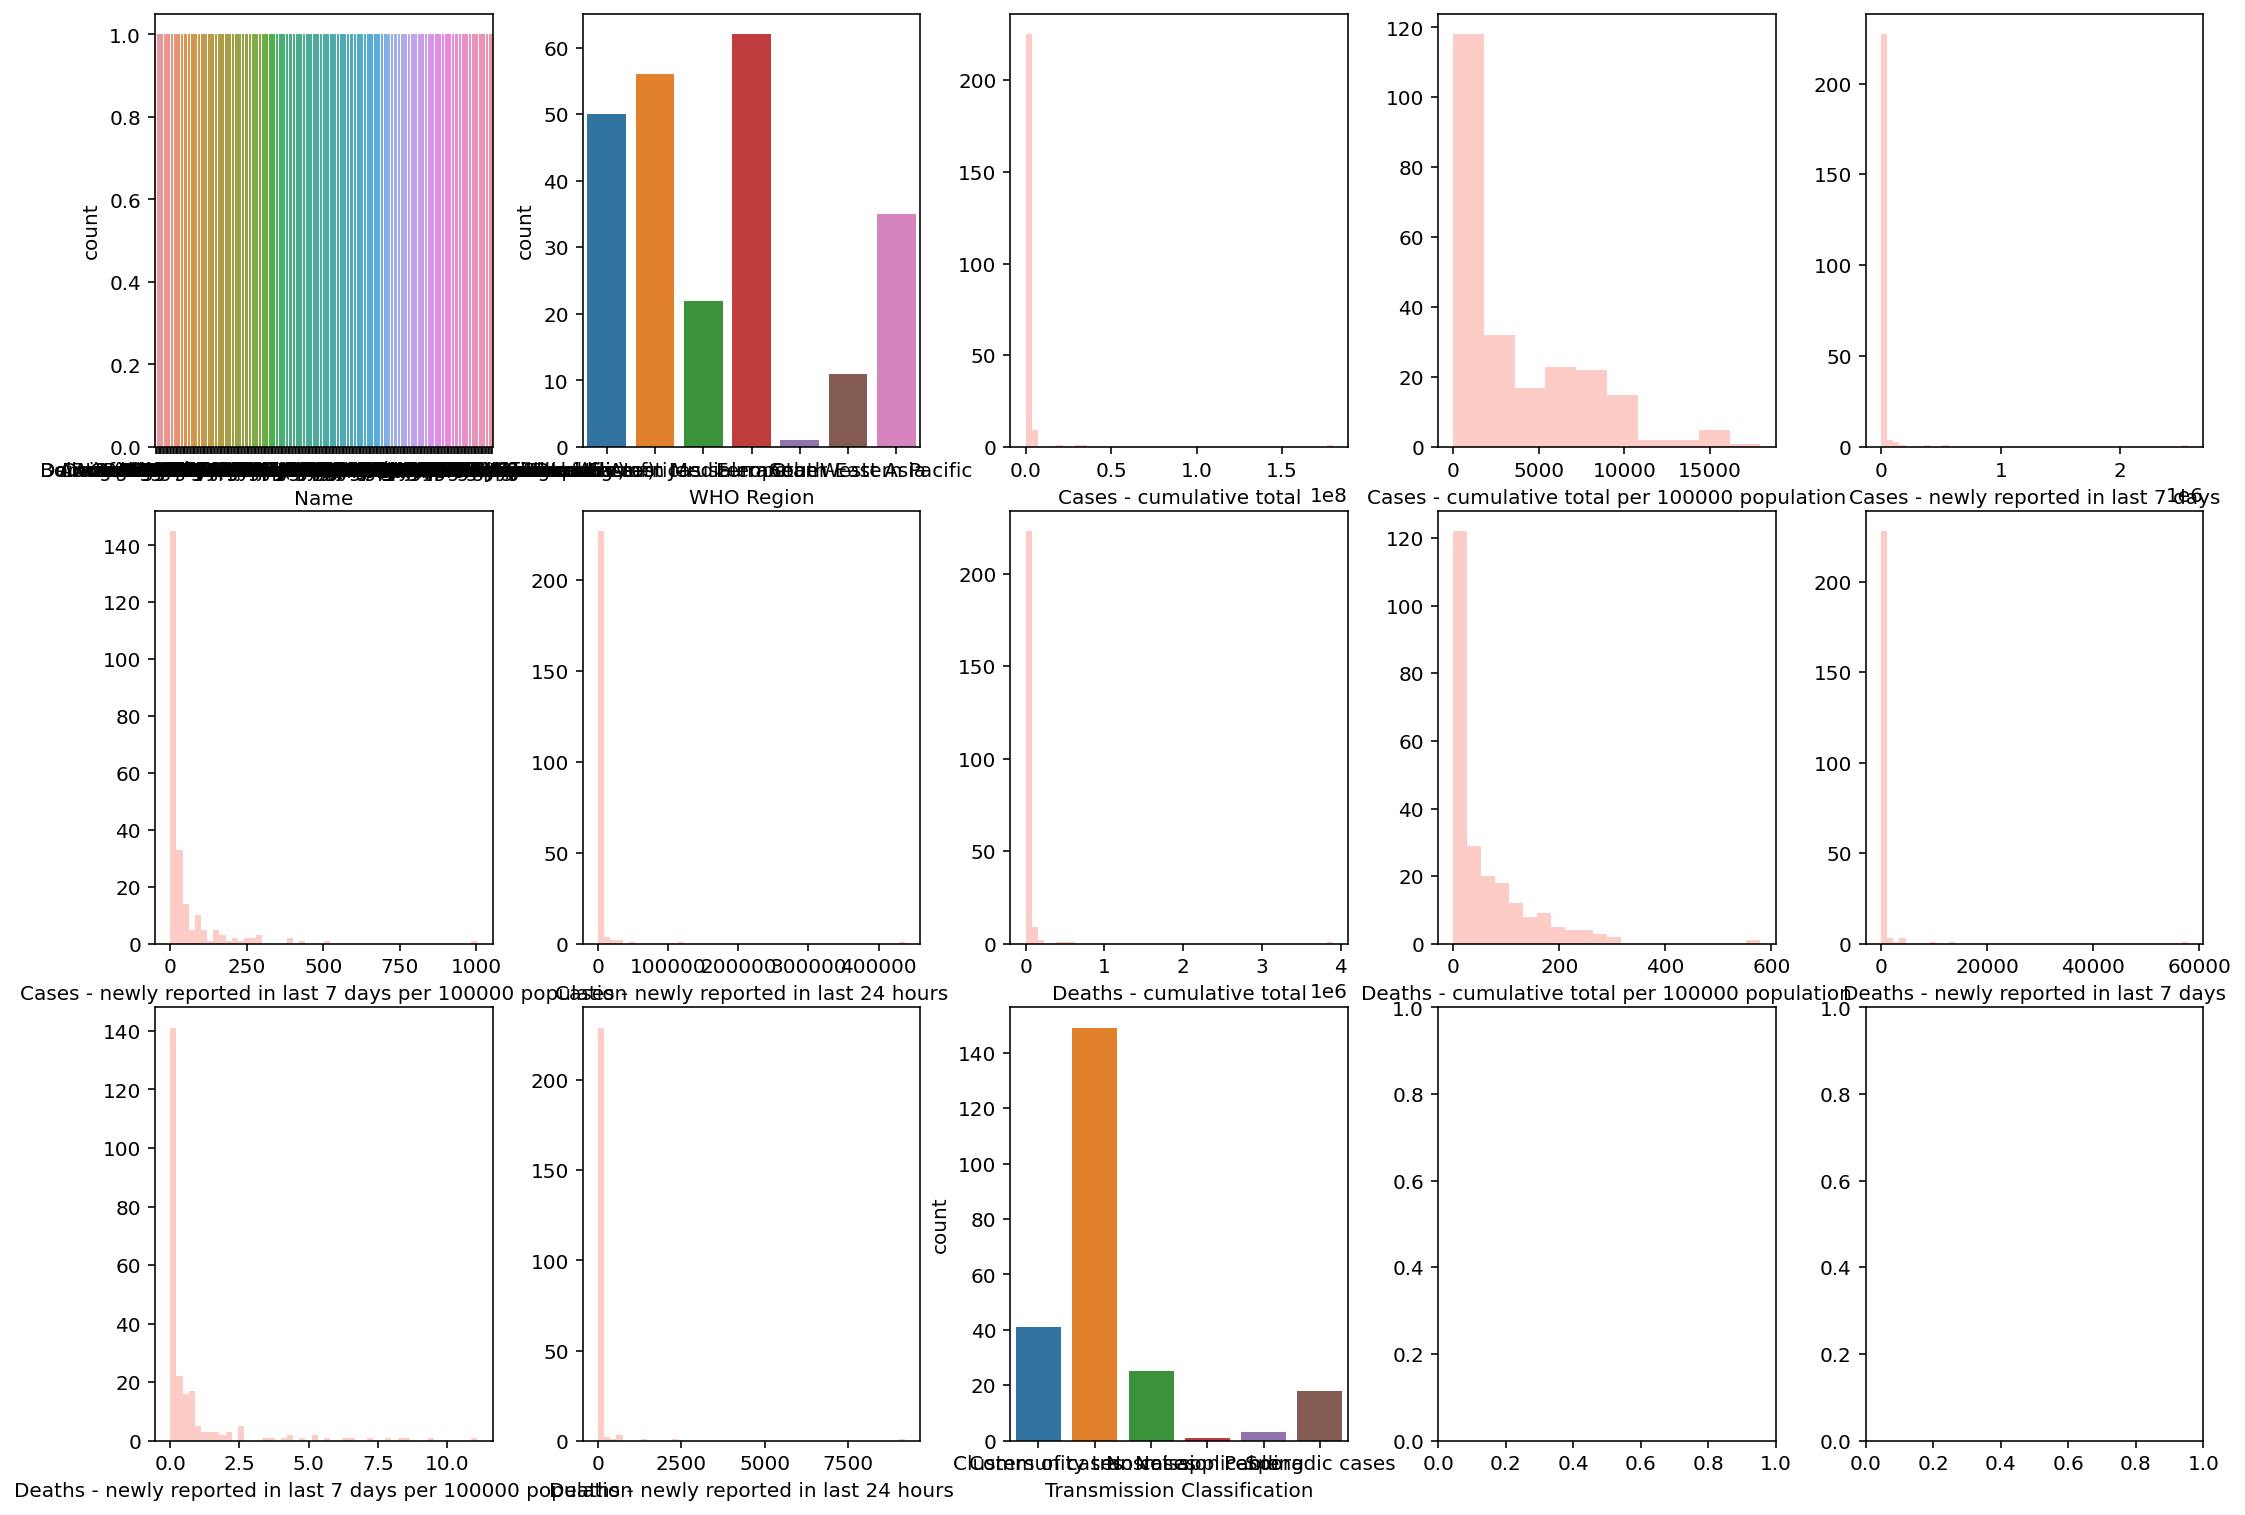

In [13]:
#plot คร่าวๆทุก feature
plot_mn(df, df.columns, 3, 'hist')

<AxesSubplot:xlabel='WHO Region', ylabel='count'>

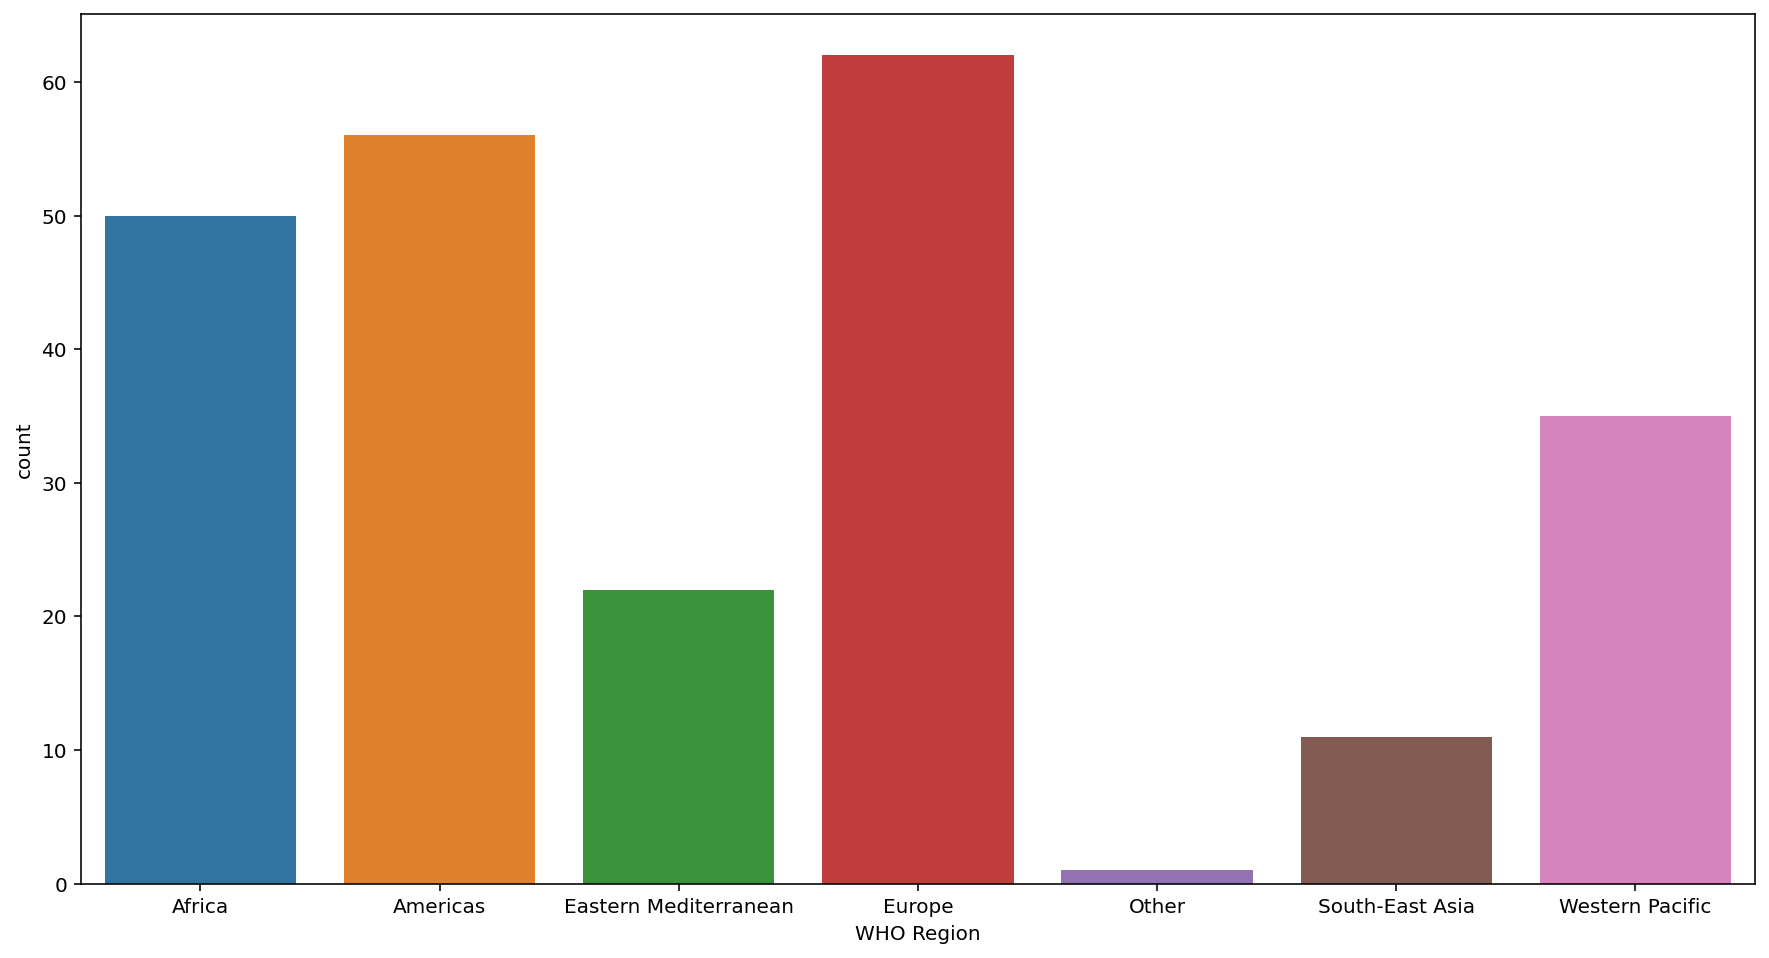

In [14]:
#WHO Region countplot
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='WHO Region')

<AxesSubplot:xlabel='Transmission Classification', ylabel='count'>

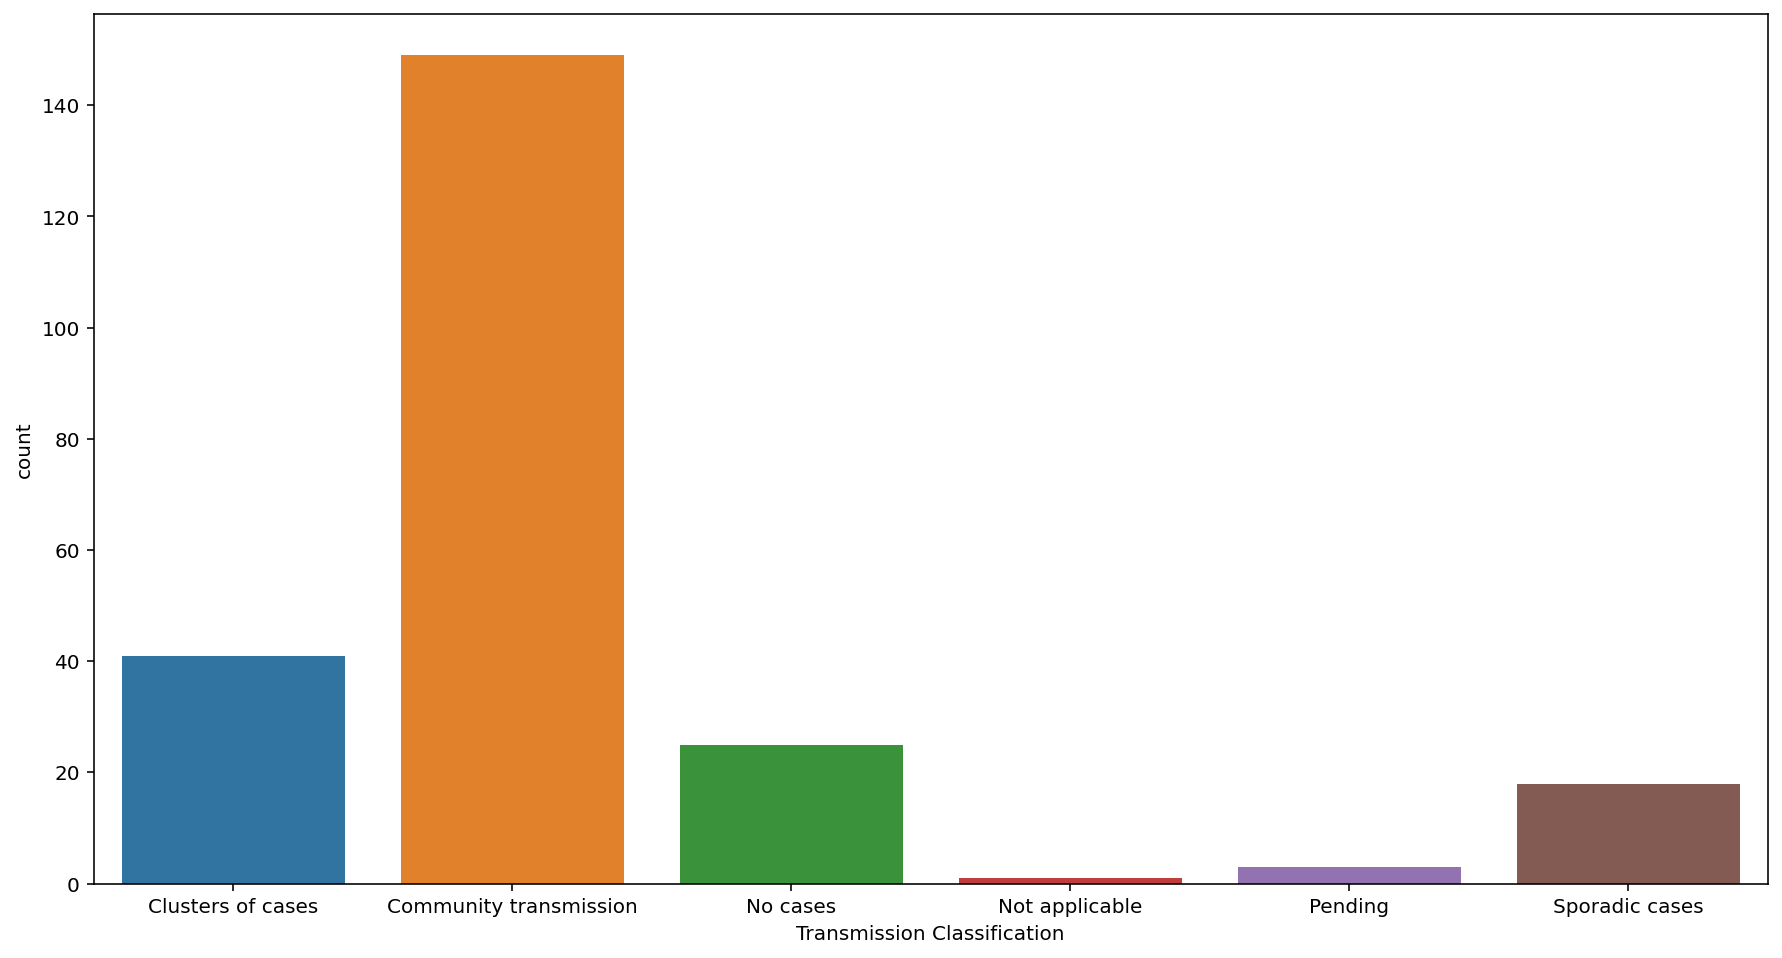

In [15]:
#Transmission Classification countplot
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Transmission Classification')

In [16]:
df.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours',
       'Transmission Classification'],
      dtype='object')

In [17]:
cols=['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours',
       'Transmission Classification']

### แต่ละคอลัมน์มีความสัมพันธ์ต่อกันดัง Heatmap ข้างล่างนี้

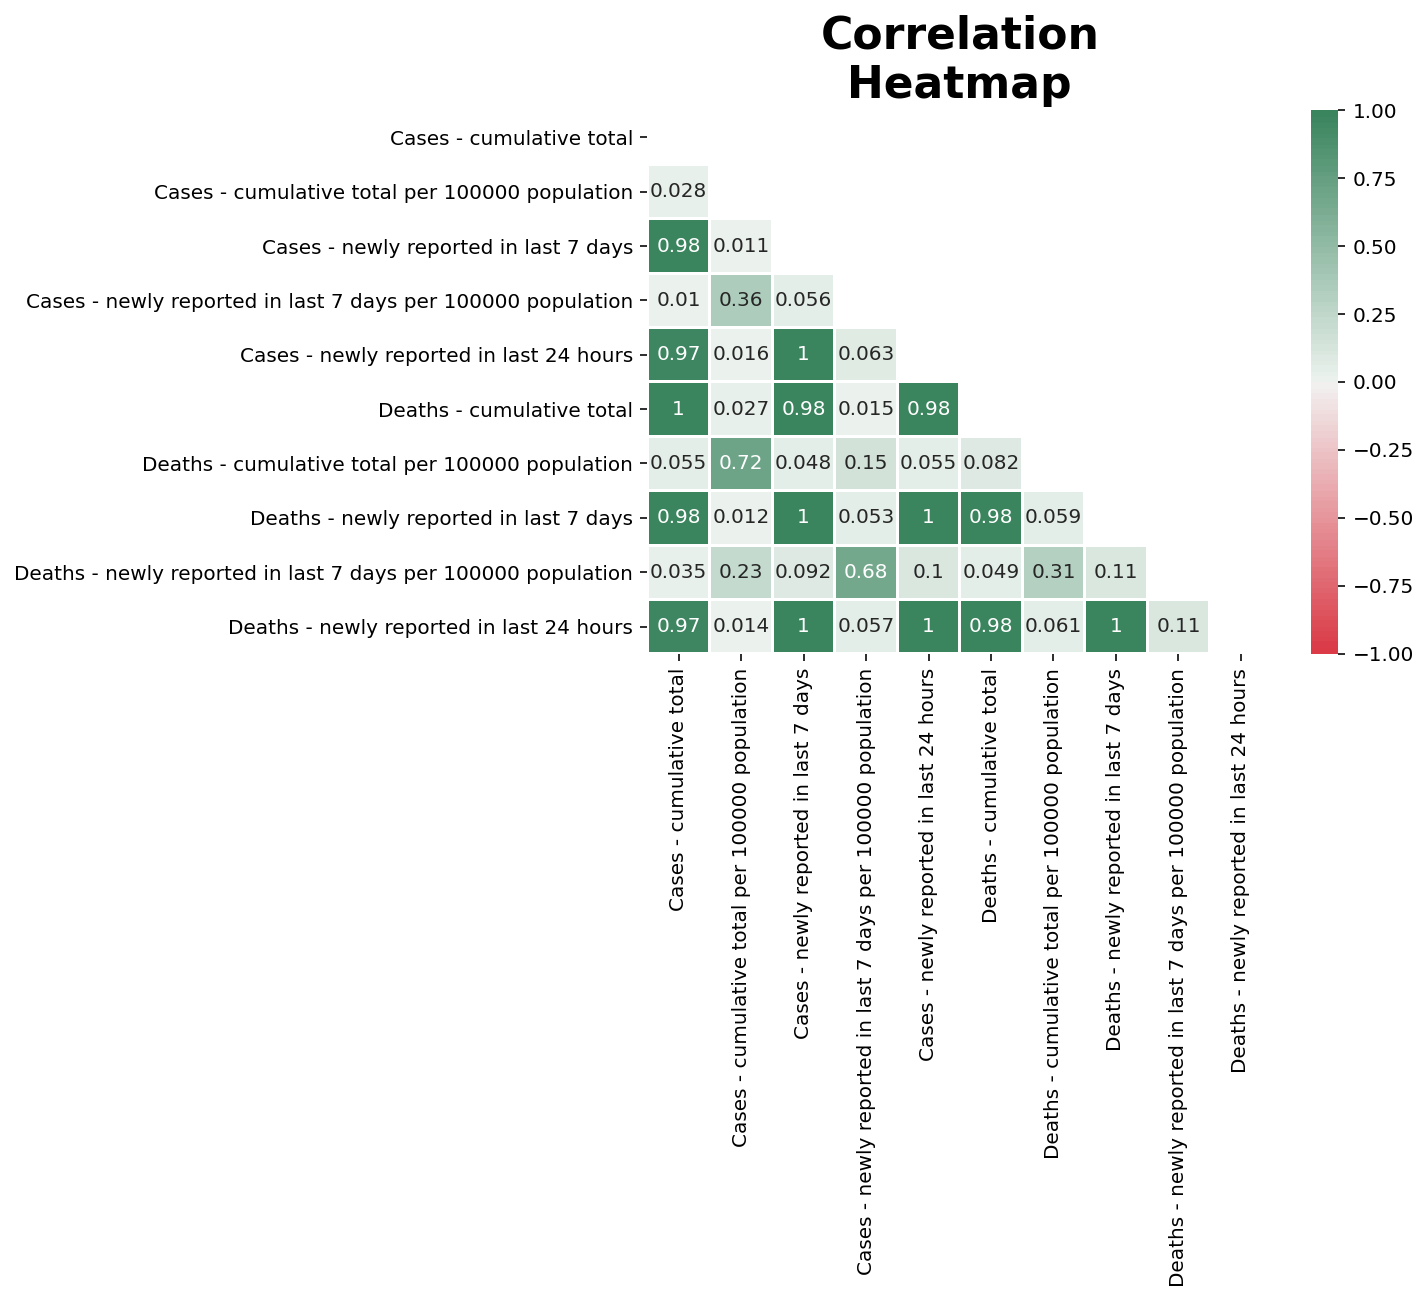

In [18]:
dcorr=df[cols].corr()
# dcorr

mask = np.zeros_like(dcorr)
# mask.shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7,5)) 
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100), 
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax).set_title("Correlation\nHeatmap", fontsize=22,fontweight="bold");

## 2. ตั้งประเด็นคำถามที่น่าสนใจพร้อมสร้างและวิเคราะห์ข้อมูลด้วย machine learning model (20 คะแนน)


### ประเด็นคำถามที่น่าสนใจคือ ในเมื่อประเทศเหล่านี้มีผู้ติดเชื้อเหมือนกันแต่ แต่ละประเทศนั้นต่างกันอย่างไร? จัดอยู่ในลักษณะแบบไหนกันแน่? 
- โดยวิธีที่เราจะเลือกใช้คือทำ Clustering ด้วย KMeans Clustering ในการแบ่งประเภท
- Columns ที่เลือกใช้มีเพียงแค่ Cases - cumulative total per 100000 population กับ Deaths - cumulative total per 100000 population
- เราจะทำการลบแถวของ Global และ other ออกเพราะเราไม่ต้องการจำนวนทั้งหมดและต้องการแต่ละประเทศแยกของใครของมัน
- และทำการลบ Transmission Classification ที่เป็น No cases ออก เพราะเราต้องการที่จะวิเคราะห์ประเทศที่มีผู้ป่วยที่ติดเชื้อ COVID-19

เนื่องจาก 2 คอลัมน์นี้เป็นคอลัมน์ที่มีสัดส่วนที่ชัดเจน คือยอดสะสมต่อจำนวนประชากร 1 แสนคน ซึ่งเป็นข้อมูลที่ค่อนข้างแฟร์ในแบบที่เทียบกับประเทศอื่นได้ในรูปแบบของอัตราส่วนเดียวกัน เราจึงเลือกใช้ 2 คอลัมน์นี้

In [19]:
# your code
cols2=['Cases - cumulative total per 100000 population',
       'Deaths - cumulative total per 100000 population']

In [20]:
df[cols2].head()

,Cases - cumulative total per 100000 population,Deaths - cumulative total per 100000 population
0,2305.281168,50.024399
1,10047.580000,180.580000
2,2183.650000,28.500000
3,8548.140000,238.570000
4,8695.310000,169.130000


In [21]:
X=df.drop(index=[0,201], axis=0,inplace=True) # ลบแถวของ Global กับ others ออก
X=df.drop(index=df[df['Transmission Classification'] == 'No cases'].index, axis=0) #ลบ Transmission Classification ที่เป็น No cases ออก
X

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
1,United States of America,Americas,33257768,10047.58,82369,24.88,14239,597727,180.58,2136,0.65,355,Community transmission
2,India,South-East Asia,30134445,2183.65,371652,26.93,51667,393310,28.50,9820,0.71,1329,Clusters of cases
3,Brazil,Americas,18169881,8548.14,541293,254.65,115228,507109,238.57,13416,6.31,2392,Community transmission
4,France,Europe,5655376,8695.31,11620,17.87,1796,110001,169.13,258,0.40,44,Community transmission
5,Russian Federation,Europe,5409088,3706.52,127779,87.56,20393,132064,90.50,3619,2.48,601,Clusters of cases
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Northern Mariana Islands (Commonwealth of the),Western Pacific,183,317.95,0,0.00,0,2,3.47,0,0.00,0,Pending
211,New Caledonia,Western Pacific,129,45.18,1,0.35,0,0,0.00,0,0.00,0,Sporadic cases
213,Falkland Islands (Malvinas),Americas,60,1722.65,0,0.00,0,0,0.00,0,0.00,0,Sporadic cases
215,Holy See,Europe,26,3213.84,0,0.00,0,0,0.00,0,0.00,0,Sporadic cases


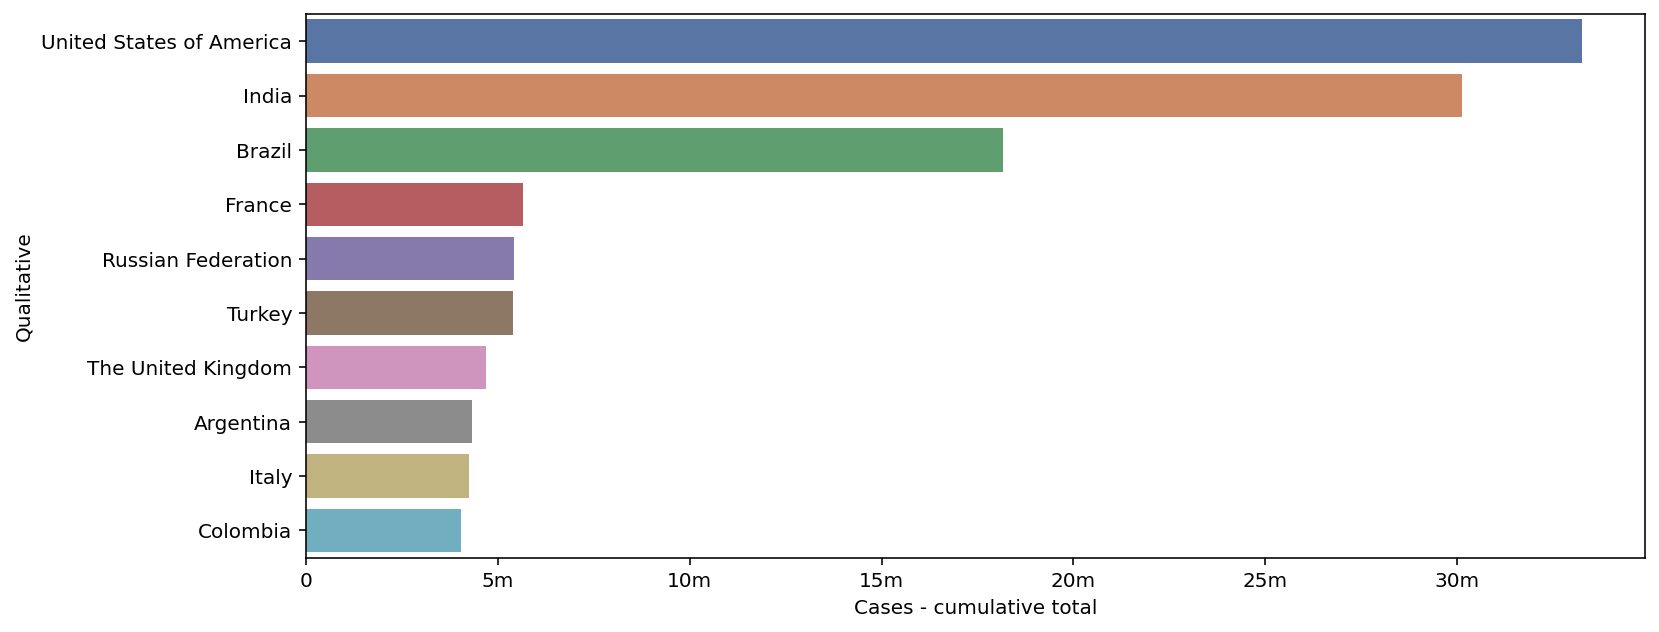

In [22]:
# Top10 ประเทศที่มีจำนวนเคสที่ติดเชื้อมากที่สุด
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
sns.barplot(x=X['Cases - cumulative total'][:10], y=['United States of America', 'India', 'Brazil', 'France', 'Russian Federation', 'Turkey', 'The United Kingdom', 'Argentina', 'Italy', 'Colombia'], palette="deep", ax=ax)
ax.set_ylabel("Qualitative");
ax.set_xticklabels(['0','5m','10m','15m','20m','25m','30m']); # m = million

In [23]:
X=X[cols2]

### ค้นหา Optimal number of clusters ด้วยกราฟ silhouette_score เพราะค่อนข้างบอกได้แม่นยำและดูง่าย โดยจะดูกราฟและสกอร์ตั้งแต่คลัสเตอร์จำนวน 2 คลัสเตอร์ ไปจนถึง 6 คลัสเตอร์เพื่อเปรียบเทียบและวิเคราะห์ในการเลือกจำนวนที่น่าจะโอเคที่สุด

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

In [25]:
def sil_score(X, from_k=2, to_k=6):
    '''
    calculate silhouette score for k clusters
    '''
    sils=[]
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k)
        m.fit(X)
        silhouette_avg = silhouette_score(X, m.labels_).round(4)
        sils.append([silhouette_avg, k])
    return sils

In [26]:
ss=sil_score(X, 2, 6)
print(f'scores = {ss}')
print(f'optimal number of clusters = {max(ss)[1]}')

scores = [[0.6934, 2], [0.6877, 3], [0.6576, 4], [0.6556, 5], [0.6416, 6]]
optimal number of clusters = 2


In [27]:
def silhouette_plot(X, from_k, to_k):
    sil_scores=[]
    for k in range(from_k, to_k + 1):
        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X) # Fit the training data to the visualizer
        visualizer.poof() # Draw/show/poof the data
#         print(visualizer.silhouette_score_)
#         sil_scores.append([k, visualizer.silhouette_score_])
        sil_scores.append([visualizer.silhouette_score_, k])
    return sil_scores

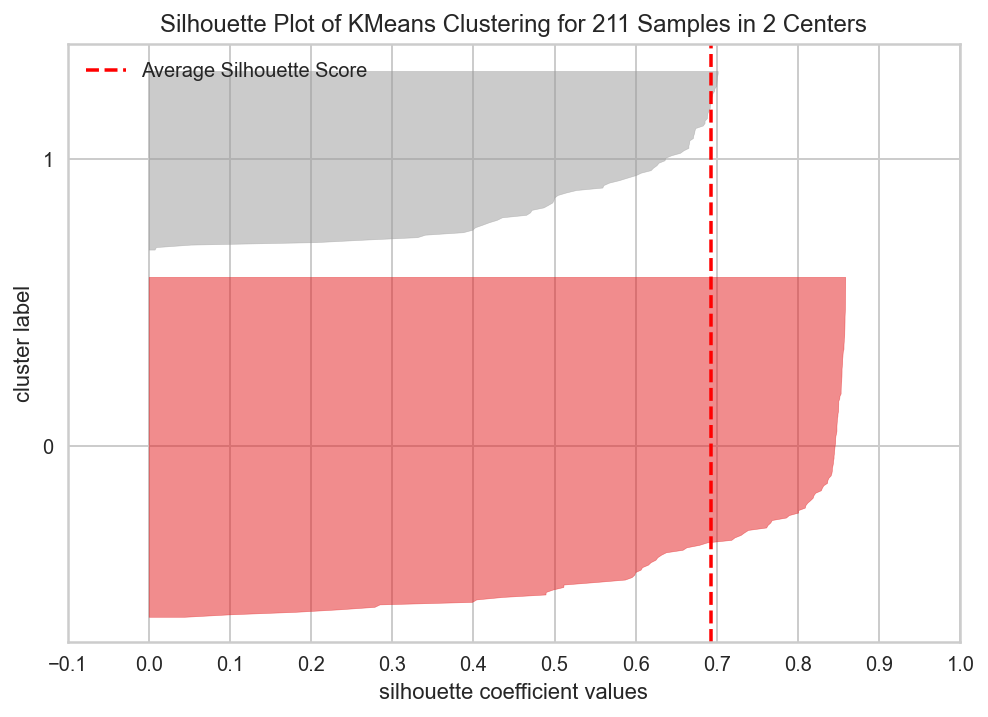

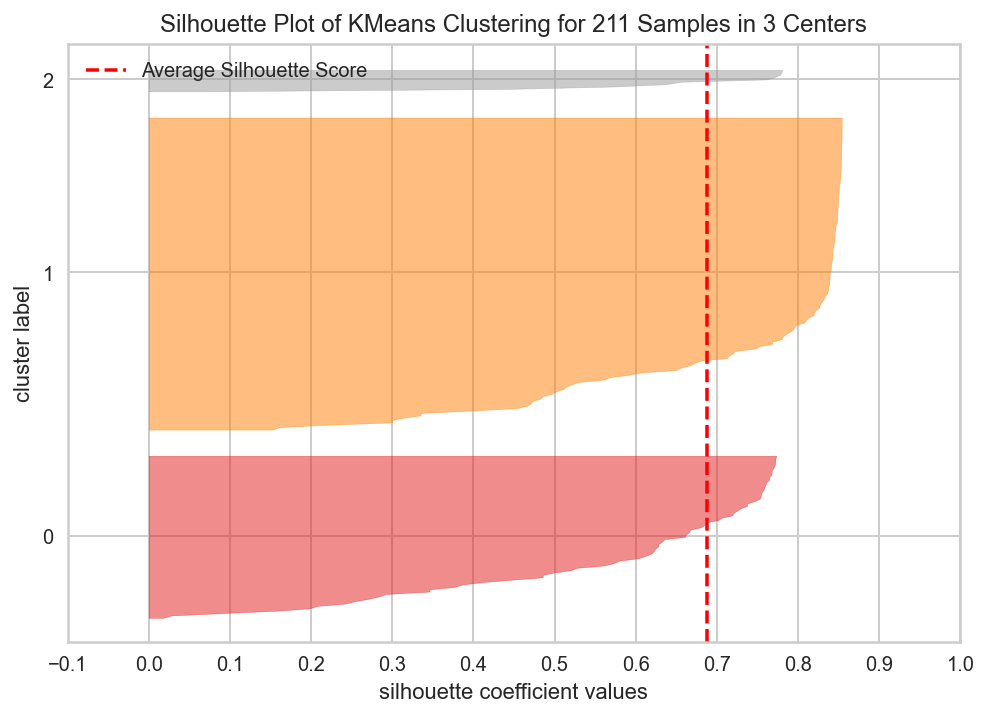

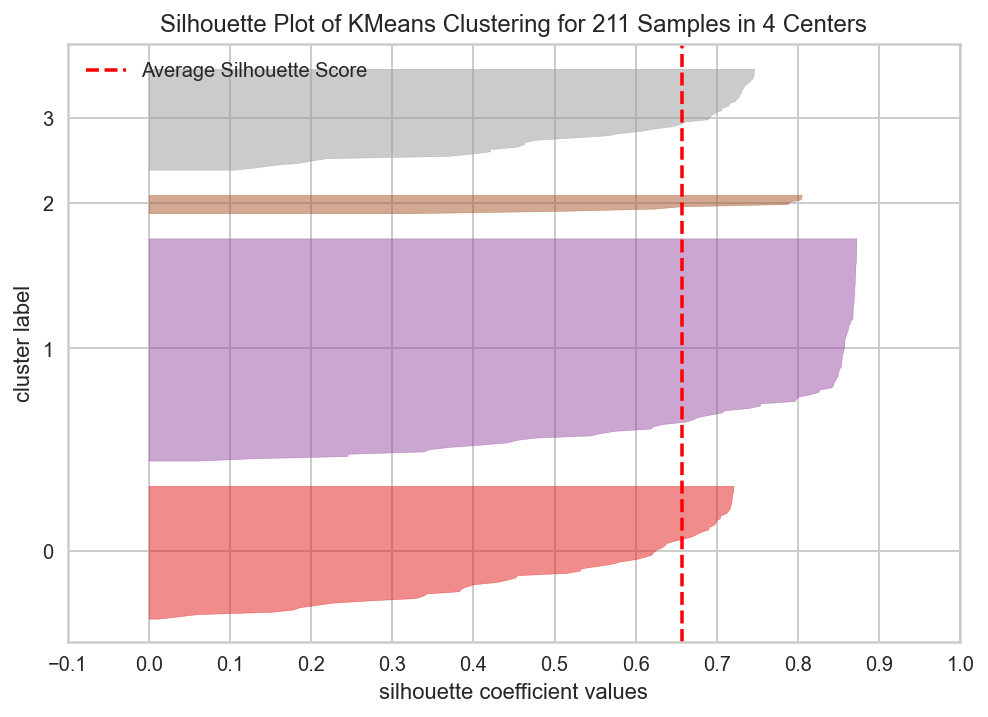

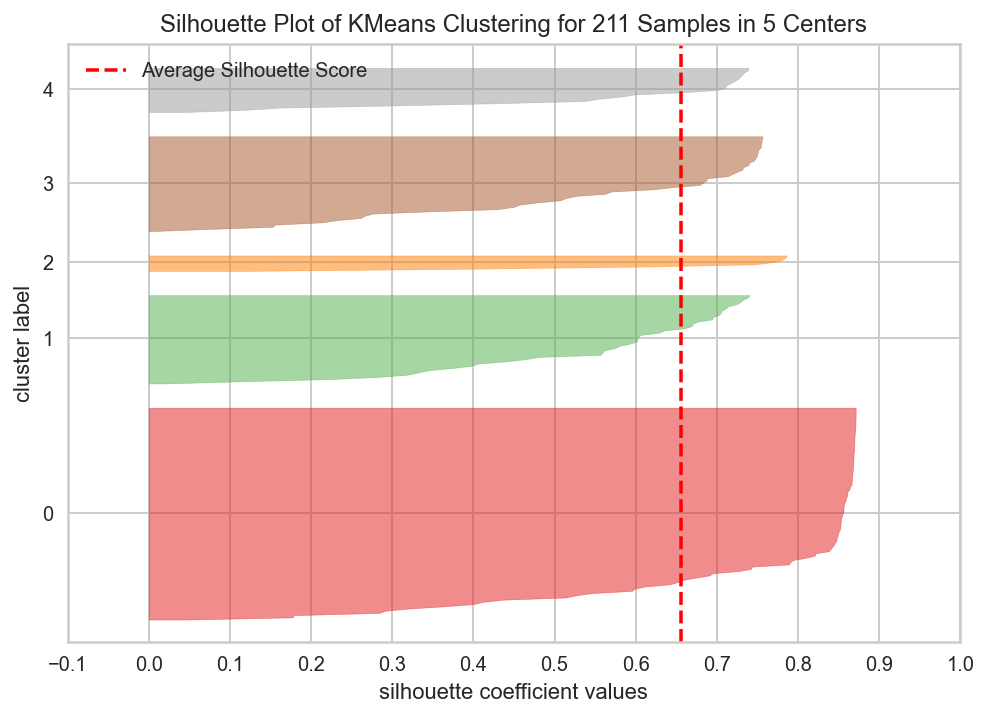

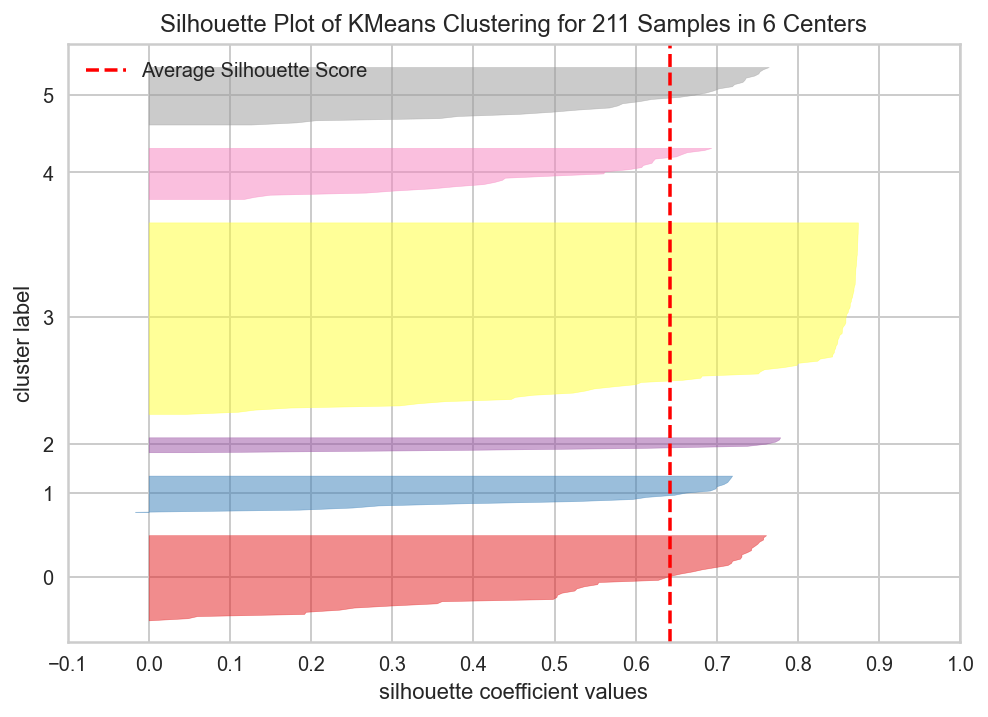

In [28]:
scores=silhouette_plot(X, 2, 6)

### หลังจากดู Silhouette plot แล้ววิเคราะห์ได้ว่า
- 2 และ 3 คลัสเตอร์ กำลังดีและน่าสนใจ
- ถ้าเป็น 4 5 6 นั้นอาจจะยากไปสำหรับการตีความคลัสเตอร์นั้นๆเพราะบางอันมีเส้นค่าเฉลี่ยหรือเส้นประสีแดงที่ให้ค่า silhouette coef ที่น้อย
- ซึ่งเราจะใช้ 3 คลัสเตอร์เพราะว่า ทุกคลัสเตอร์มีสกอร์เลยเส้นประค่าเฉลี่ย และมีค่า silhouette coef อยู่ในระดับที่ค่อนข้างโอเค
- แต่ละคลัสเตอร์ดูแบ่งกันได้ชัดเจน และดูเกาะกลุ่มกันพอรับได้ ถึงแม้ cluster lebel ที่ 2 จะมีน้อย แต่ค่อนข้างแบกแยกออกมาได้ชัดเจนอยู่

In [29]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [30]:
model.cluster_centers_.round(3)

array([[ 1206.427,    22.43 ],
       [ 7400.179,   130.631],
       [14523.879,   177.761]])

In [31]:
model.transform(X) # the distance between each point and centroid

array([[ 8842.56763177,  2647.8724551 ,  4476.29988765],
       [  977.24210876,  5217.52838381, 12341.13165875],
       [ 7344.8941465 ,  1153.02468243,  5976.04838757],
       [ 7490.31997403,  1295.7033785 ,  5828.57539043],
       [ 2501.01975425,  3693.87670091, 10817.71095089],
       [ 5188.41926474,  1008.03627821,  8130.03245839],
       [ 5696.64792646,   502.88329322,  7623.23673411],
       [ 8367.39575601,  2172.88143947,  4952.02504067],
       [ 5932.12278832,   277.39178727,  7388.49567935],
       [ 6710.21269284,   518.80848309,  6609.63763421],
       [ 6776.03410573,   582.03732356,  6543.0428859 ],
       [ 3274.36864767,  2920.60858016, 10044.46415469],
       [ 2533.30221745,  3661.75205556, 10785.60380845],
       [ 6381.88389961,   197.38842919,  6937.99696566],
       [  739.99463695,  5470.90982676, 12594.38916831],
       [ 3900.19991129,  2294.78598492,  9418.63956597],
       [  448.59043476,  6643.24980978, 13766.93597669],
       [ 5001.02642366,  1303.5

In [32]:
X['cluster'] = model.labels_
X

,Cases - cumulative total per 100000 population,Deaths - cumulative total per 100000 population,cluster
1,10047.58,180.58,1
2,2183.65,28.50,0
3,8548.14,238.57,1
4,8695.31,169.13,1
5,3706.52,90.50,0
...,...,...,...
209,317.95,3.47,0
211,45.18,0.00,0
213,1722.65,0.00,0
215,3213.84,0.00,0


### หลังจากได้ทำการ label cluster ต่างๆเรียบร้อยแล้วก็ทำการตรวจสอบเพิ่มเติมเพื่ออธิบายแต่ละ cluster ว่ามีความต่างกันอย่างไรด้วยวิธีต่างๆ

In [33]:
# ตารางค่าเชิงสถิติ
X.groupby('cluster').describe().T

cluster                                                          0  \
Cases - cumulative total per 100000 population  count   132.000000   
                                                mean   1206.426742   
                                                std    1255.276222   
                                                min       0.850000   
                                                25%     176.427500   
                                                50%     577.285000   
                                                75%    2170.540000   
                                                max    4036.990000   
Deaths - cumulative total per 100000 population count   132.000000   
                                                mean     22.430076   
                                                std      32.669309   
                                                min       0.000000   
                                                25%       2.045000   
                                                50%       8.305000   
                                                75%      29.072500   
                                                max     179.820000   

cluster                                                           1  \
Cases - cumulative total per 100000 population  count     69.000000   
                                                mean    7400.178696   
                                                std     1719.168250   
                                                min     4355.400000   
                                                25%     6062.030000   
                                                50%     7337.790000   
                                                75%     8548.140000   
                                                max    10543.560000   
Deaths - cumulative total per 100000 population count     69.000000   
                                                mean     130.631304   
                                                std       87.636549   
                                                min       10.120000   
                                                25%       74.620000   
                                                50%      114.790000   
                                                75%      169.130000   
                                                max      579.500000   

cluster                                                           2  
Cases - cumulative total per 100000 population  count     10.000000  
                                                mean   14523.879000  
                                                std     2013.582477  
                                                min    11273.770000  
                                                25%    13004.857500  
                                                50%    15182.930000  
                                                75%    15573.707500  
                                                max    17960.270000  
Deaths - cumulative total per 100000 population count     10.000000  
                                                mean     177.761000  
                                                std       96.663531  
                                                min       38.290000  
                                                25%       91.462500  
                                                50%      195.430000  
                                                75%      262.900000  
                                                max      283.260000

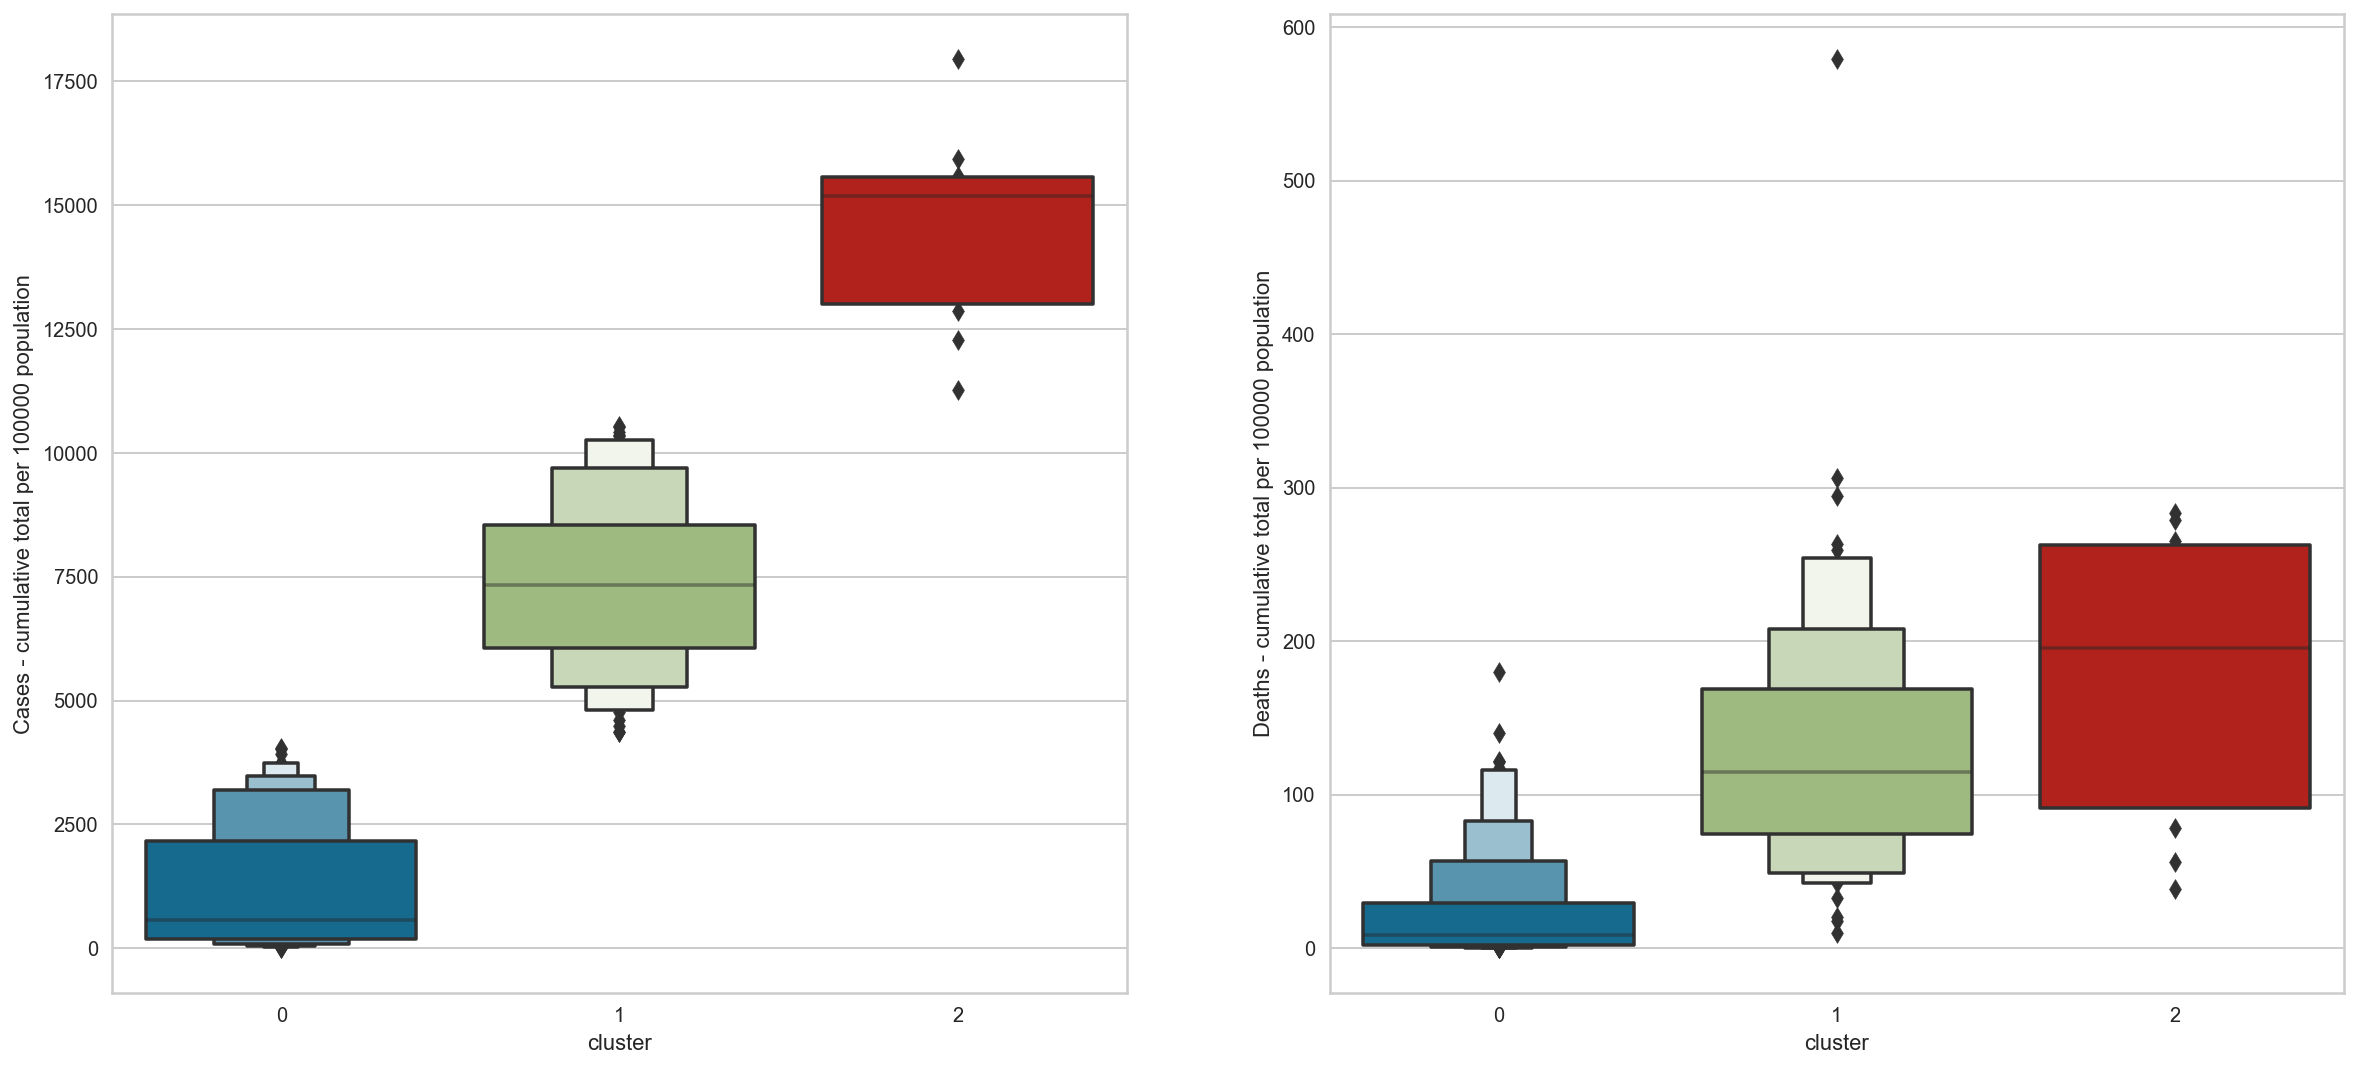

In [34]:
# boxen plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols2):
    sns.boxenplot(x='cluster', y=col, data=X, ax=ax[i])

หลังจากทำ boxen plot จะเห็นข้อมูลได้ดีและค่อนข้างชัดว่ามีความต่างกันยังไง ซึ่งฝั่งซ้ายที่เป็น case cumulative per 100000 population แบ่งเกาะกลุ่มกันได้ชัดดี ส่วน Deaths cumulative per 10000 population มีลักษณะค่อนข้างใกล้เคียงกันในแต่ละคลัสเตอร์แต่ยังพอเห็นความแตกต่างอยู่ ซึ่งมีรายละเอียดของค่าเฉลี่ยดังนี้

case cumulative per 100000 population
- Cluster 0 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 7400 ราย
- Cluster 1 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 1206 ราย 
- Cluster 2 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 14523 ราย	

deaths cumulative per 100000 population
- Cluster 0 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 130 ราย
- Cluster 1 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 22 ราย 
- Cluster 2 มีค่า case cumulative per 100000 population เฉลี่ยอยู่ที่ประมาณ 177 ราย	

เพื่อให้เห็นความแตกต่างและผลลัพธ์คือได้เห็นตัวเลขที่ค่อนข้างต่างกันพอสมควร

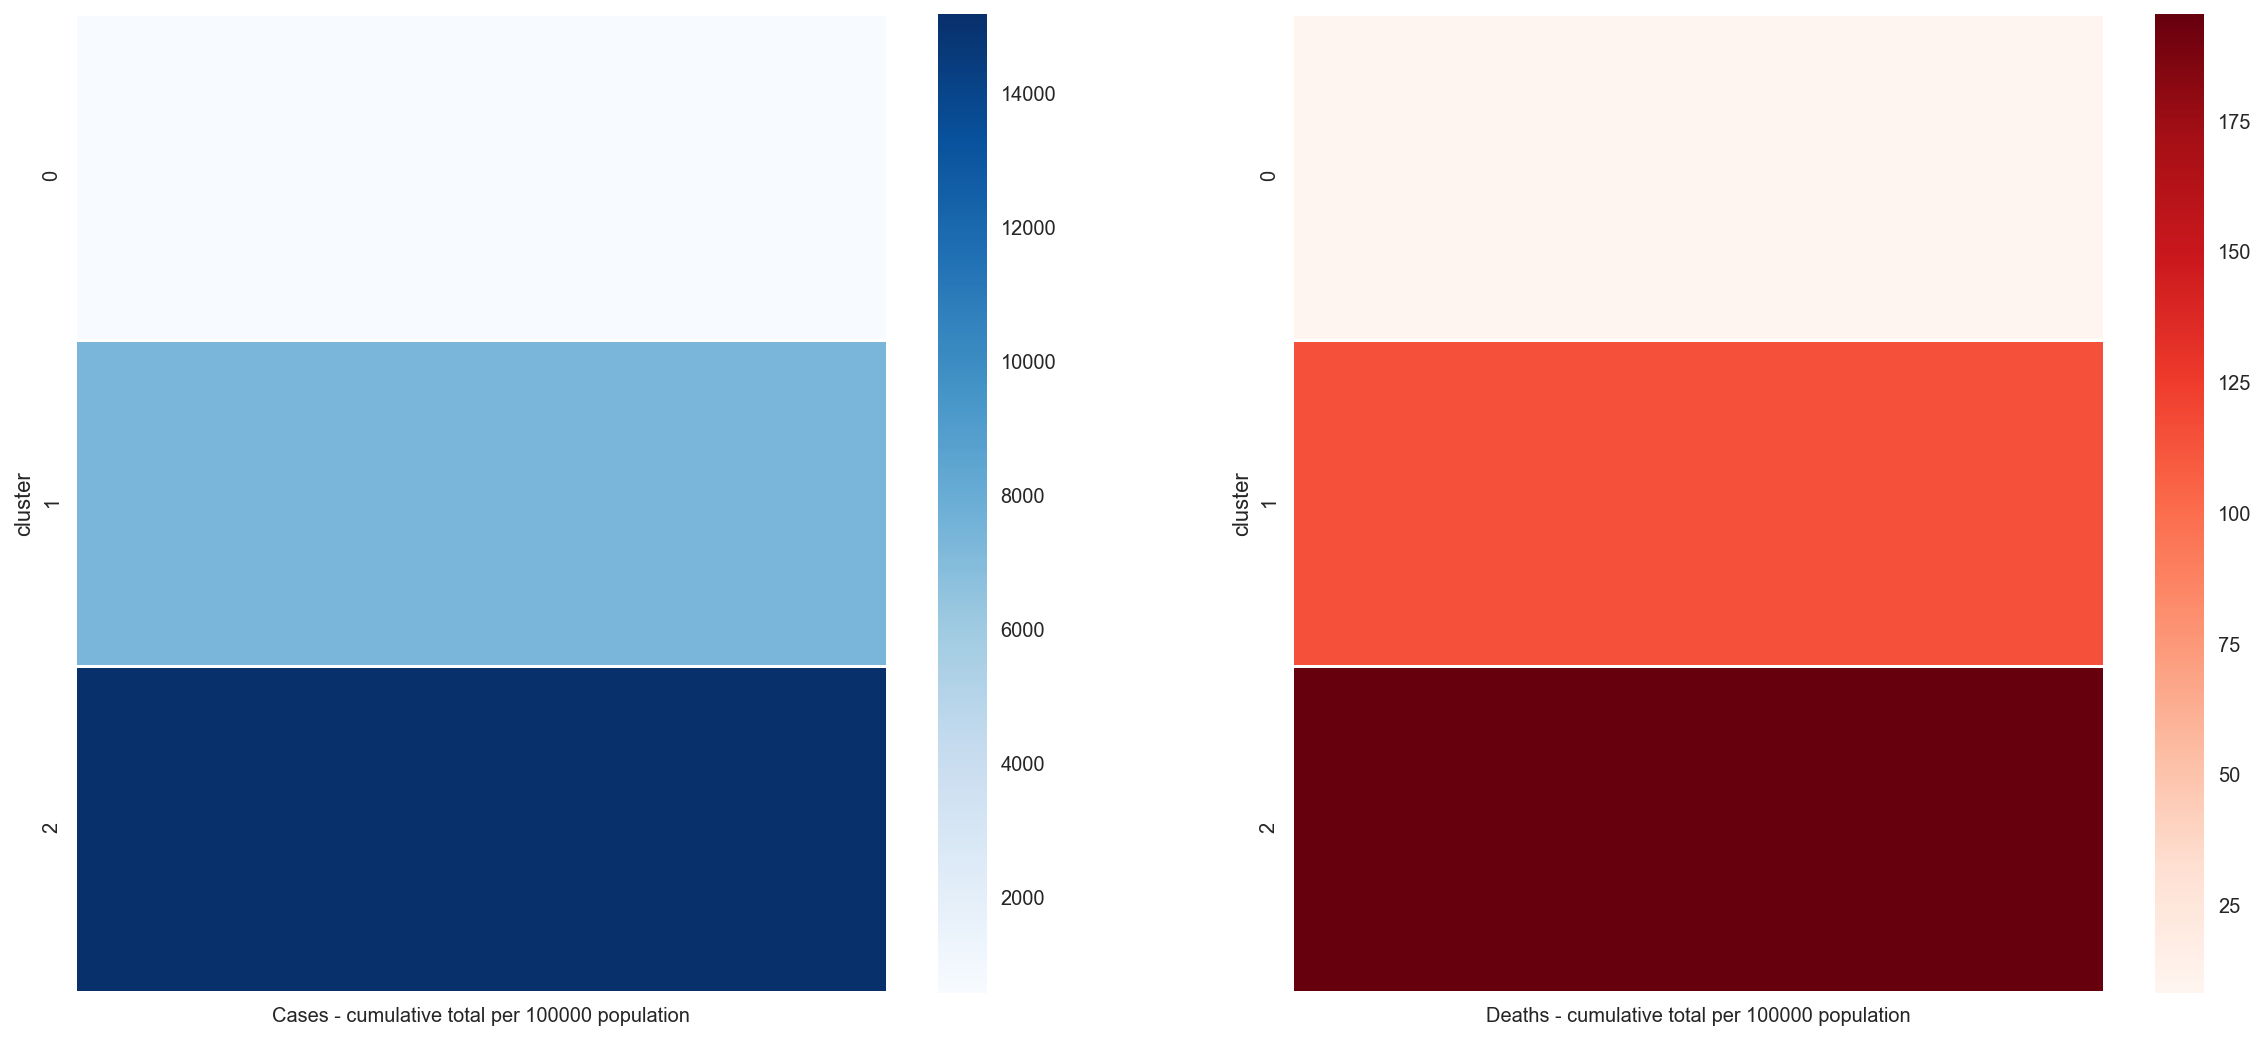

In [35]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
sns.heatmap(X.iloc[:,[0,2]].groupby('cluster').median(), cmap="Blues", linewidths=1,ax=ax[0]) # Case cumulative per 100000 population Heatmap
sns.heatmap(X.iloc[:,[1,2]].groupby('cluster').median(), cmap="Reds", linewidths=1,ax=ax[1]) # Death cumulative per 100000 population Heatmap
fig.show()

เนื่องจาก median สามารถเป็นตัวแทนของแต่ละ feature ได้ จึงนำมาทำ Heatmap เทียบกันให้เห็นความต่างของแต่ละ cluster ได้เลย 
- จาก Heatmap แสดงให้เห็นสีที่แบ่งกันได้ ซึ่งสีจะเข้มมากน้อยตามจำนวนของตัวเลขและทำให้เราได้เห็นถึงความต่างของทั้ง case cumulative per 100000 population และ death per 100000 population ได้ดี 

## สรุปได้ว่า
- แบ่งได้ 3 cluster จากคอลัมน์ case cumulative per 100000 population และ Death cumulative per 100000 population
- cluster 0 เป็นตัวแทนของประเทศที่เสี่ยงปานกลาง เพราะจำนวนผู้ติดเชื้อค่อนข้างมากแต่ยังอยู่ตรงกลางถ้าเทียบกับกลุ่มอื่นและมีจำนวนผู้เสียชีวิตดูกระจายตัวพอๆกับ cluster 2 ซึ่งขึ้นอยู่แต่ละประเทศจะรับมือได้ดีแค่ไหน
- cluster 1 เป็นตัวแทนของประเทศที่เสี่ยงน้อย เพราะจำนวนผู้ติดเชื้อน้อยซึ่งอาจทำให้เชื้อแพร่กระจายได้น้อยที่สุดและจำนวนผู้เสียชีวิตก็น้อยเมื่อเทียบกับกลุ่มอื่น
- cluster 2 เป็นตัวแทนของประเทศที่เสี่ยงมาก เพราะผู้ติดเชื้อมากที่สุดซึ่งการแพร่กระจายมีโอกาสมากและจำนวนผู้เสียชีวิตก็มากอีกด้วย

### หลังจากที่ทำการ Clustering และได้ข้อสรูปว่า lebel cluster ที่เป็น 0 1 2 เราได้ตีความได้สามกลุ่มได้แก่ เสี่ยงปานกลาง เสี่ยงน้อย และเสี่ยงมาก
- เราจึงจะทำ Classification โดยใช้ LightGBM Classifier โดยใช้ Target col เป็น cluster เพื่อทดสอบว่า จาก feature col ทั้งสอง Cases และ Death cumulative total per 100000 population 
- เพื่อทดสอบประสิทธิภาพจากการ Clustering ที่ทำ โดยดูจาก score ของข้อมูลทั้ง Train และ Test

In [36]:
df2=X
df2

,Cases - cumulative total per 100000 population,Deaths - cumulative total per 100000 population,cluster
1,10047.58,180.58,1
2,2183.65,28.50,0
3,8548.14,238.57,1
4,8695.31,169.13,1
5,3706.52,90.50,0
...,...,...,...
209,317.95,3.47,0
211,45.18,0.00,0
213,1722.65,0.00,0
215,3213.84,0.00,0


In [37]:
import lightgbm as lgb
print(f'lightgbm version {lgb.__version__}')

lightgbm version 3.1.1


In [38]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, ShuffleSplit, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score

In [39]:
df2.columns

Index(['Cases - cumulative total per 100000 population',
       'Deaths - cumulative total per 100000 population', 'cluster'],
      dtype='object')

In [40]:
feature_cols=['Cases - cumulative total per 100000 population','Deaths - cumulative total per 100000 population']
target_col='cluster'

X=df2[feature_cols]
y=df2[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=1, 
                                                    stratify=y)

In [41]:
clf=lgb.LGBMClassifier()

In [42]:
clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [43]:
# tuning parameters: https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
# https://sites.google.com/view/lauraepp/parameters
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

# clf = lgb.LGBMClassifier(**params)

In [44]:
# eval_metric: https://lightgbm.readthedocs.io/en/latest/Parameters.html?highlight=metric#metric-parameters
fit_params={'early_stopping_rounds':20, 
            'eval_metric': 'binary_logloss', #['binary_logloss', 'auc']
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }

clf.fit(X_train, y_train, **fit_params)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 0.190456
[20]	valid_0's multi_logloss: 0.0820891
[30]	valid_0's multi_logloss: 0.0612243
[40]	valid_0's multi_logloss: 0.0684703
Early stopping, best iteration is:
[29]	valid_0's multi_logloss: 0.0611485


LGBMClassifier()

In [45]:
clf.score(X_train, y_train) # classification accuracy score

1.0

In [46]:
clf.score(X_test, y_test) # classification accuracy score

0.9767441860465116

#### หลังจากใช้ LightGBM classifier แล้วได้คะแนนอยู่ในระดับที่ดี แต่เราจะลองทดสอบดู Detail ของการทำนายอีกโดยการทำ Confusion Matrix

In [47]:
cm=confusion_matrix(y_test, clf.predict(X_test))
cm

array([[27,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  2]])

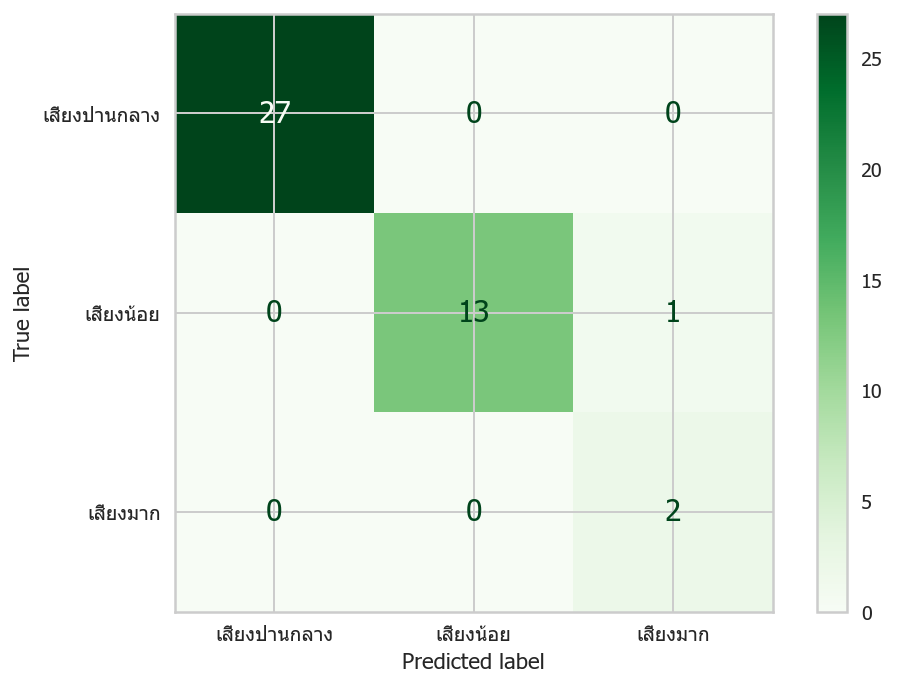

In [48]:
plt.rcParams['font.size']=15
plt.rcParams['font.family']='Tahoma'
plot_confusion_matrix(clf, X_test, y_test, cmap='Greens', display_labels=['เสี่ยงปานกลาง', 'เสี่ยงน้อย','เสี่ยงมาก']);

In [49]:
y_test.value_counts()

0    27
1    14
2     2
Name: cluster, dtype: int64

In [50]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00         8

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



In [51]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.93      0.96        14
           2       0.67      1.00      0.80         2

    accuracy                           0.98        43
   macro avg       0.89      0.98      0.92        43
weighted avg       0.98      0.98      0.98        43

